<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#source:https://darektidwell.com/using-selenium-with-google-colaboratory/
# Install cromium, its driver, and selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Set options to be headless
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

     |████████████████████████████████| 911kB 2.8MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [12.3 kB]
Get:12 http://ar

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [0]:
!pip install google_images_download

  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=9c7394ef163f0cc100fdfbd338a1f776b01cff7ad62d8cda23755d044cba1076
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
import os
ori_path = os.getcwd()
data_path = os.path.join(ori_path,'downloads')
data_path

'/content/downloads'

In [0]:
#creating object
response = google_images_download.googleimagesdownload()

search_queries = ['man hairstyle top view',
                 'women hairstyle top view']


In [0]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    size = 'medium',
                    chromedriver= '/usr/lib/chromium-browser/chromedriver',
                    aspect_ratio='square',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    size = 'medium',     
                    aspect_ratio='square',
                    print_urls=False)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [0]:
# Driver Code 

download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...


KeyboardInterrupt: ignored

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Input, Dense, Flatten,Conv2D, ZeroPadding2D, MaxPooling2D, Dropout, UpSampling2D # Import hidden layer
from keras.optimizers import Adam #For Optimizing the Neural Network
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [0]:

men_hair = "/content/drive/My Drive/downloads/"
women_hair = "/content/drive/My Drive/downloads/"

In [0]:
men_hair

'/content/drive/My Drive/downloads/'

In [0]:
img_all_train = glob(men_hair+"/man hairstyle top view/train/*.jpg")
img_all_train += glob(women_hair+"women hairstyle top view/train/*.jpg") 

img_all_test = glob(men_hair+"/man hairstyle top view/test/*.jpg")
img_all_test += glob(women_hair+"women hairstyle top view/test/*.jpg") 


In [6]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data


train_data = []
test_data = []

#Train
for img in img_all_train:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    test_data.append(img)
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (857, 224, 224, 3)
Total number of test examples: (263, 224, 224, 3)


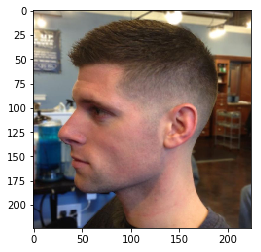

In [7]:
plt.imshow(train_data[0])

###Encoding

In [8]:
#Source:https://blog.keras.io/building-autoencoders-in-keras.html
#Source:https://www.kaggle.com/rvislaywade/visualizing-mnist-using-a-variational-autoencoder
# this is the size of our encoded representations
from keras import regularizers

# this is our input placeholder
input_img = Input(shape=(224,224,3))

#encoder part
x = Conv2D(512,(3,3),activity_regularizer=regularizers.l1(10e-5), activation='relu', padding='same', name="encoded1")(input_img) # add Layer l1 activity regularizer , mimicing PCA
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name="encoded2")(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name="encoded3")(x)
x = MaxPooling2D((2, 2), padding='same')(x)                
x = Conv2D(16, (3, 3), activation='relu', padding='same', name="encoded4")(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same', name="bottleneck")(x)

# need to know the shape of the network here for the decoder
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)
z_log_sigma = layers.Dense(latent_dim)(x)                

#decoder part
x = Conv2D(64, (3, 3), activation='relu', padding='same', name="decoded1")(encoded)
x = UpSampling2D((2, 2))(x)          
x = Conv2D(128, (3, 3), activation='relu', padding='same', name="decoded2")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name="decoded3")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name="decoded4")(x)                   
x = UpSampling2D((2, 2))(x)             
x = Conv2D(3,(3,3), activation='relu', padding='same', name="decoded5")(x)

decoded = Conv2D(3,(1,1), activation='sigmoid',padding='same', name="decoded_output")(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img,decoded)

W0805 02:20:52.057373 140233133451136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 02:20:52.102204 140233133451136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 02:20:52.114360 140233133451136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 02:20:52.164768 140233133451136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0805 02:20:52.250217 140233133451136 deprecation_wrapp

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

W0805 02:20:54.562968 140233133451136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 02:20:54.593137 140233133451136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 02:20:54.599863 140233133451136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
encoded1 (Conv2D)            (None, 224, 224, 512)     14336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 512)     0         
_________________________________________________________________
encoded2 (Conv2D)            (None, 112, 112, 256)     1179904   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 256)       0         
_________________________________________________________________
encoded3 (Conv2D)            (None, 56, 56, 64)        147520    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
__________

In [0]:
#separate encoder model
encoder = Model(input_img,autoencoder.get_layer('bottleneck').output) #bottleneck representation



In [0]:

encoded_input = Input(shape = (14,14,8))
decoder_layer = autoencoder.get_layer('decoded1')(encoded_input)
decoder_layer = autoencoder.get_layer('up_sampling2d_1')(decoder_layer)
decoder_layer = autoencoder.get_layer('decoded2')(decoder_layer)
decoder_layer = autoencoder.get_layer('up_sampling2d_2')(decoder_layer)
decoder_layer = autoencoder.get_layer('decoded3')(decoder_layer)
decoder_layer = autoencoder.get_layer('up_sampling2d_3')(decoder_layer)
decoder_layer = autoencoder.get_layer('decoded4')(decoder_layer)
decoder_layer = autoencoder.get_layer('up_sampling2d_4')(decoder_layer)
decoder_layer = autoencoder.get_layer('decoded5')(decoder_layer)
decoder_layer = autoencoder.get_layer('decoded_output')(decoder_layer)


In [0]:
decoder = Model(encoded_input, decoder_layer)

In [34]:
autoencoder.fit(train_data, train_data,
                epochs=30,
                batch_size=10,
                shuffle=True,
                validation_data=(test_data, test_data))

Train on 857 samples, validate on 263 samples
Epoch 1/30
857/857 [==============================] - 105s 122ms/step - loss: 0.6901 - val_loss: 0.6913
Epoch 2/30
857/857 [==============================] - 92s 108ms/step - loss: 0.6894 - val_loss: 0.6905
Epoch 3/30
857/857 [==============================] - 92s 107ms/step - loss: 0.6884 - val_loss: 0.6883
Epoch 4/30
857/857 [==============================] - 93s 109ms/step - loss: 0.6877 - val_loss: 0.6881
Epoch 5/30
857/857 [==============================] - 92s 107ms/step - loss: 0.6876 - val_loss: 0.6859
Epoch 6/30
857/857 [==============================] - 92s 108ms/step - loss: 0.6871 - val_loss: 0.6852
Epoch 7/30
857/857 [==============================] - 93s 109ms/step - loss: 0.6867 - val_loss: 0.6855
Epoch 8/30
857/857 [==============================] - 92s 107ms/step - loss: 0.6866 - val_loss: 0.6867
Epoch 9/30
857/857 [==============================] - 93s 109ms/step - loss: 0.6864 - val_loss: 0.6840
Epoch 10/30
857/857 [=====

In [0]:
encoded_imgs = encoder.predict(test_data)
decoded_imgs = decoder.predict(encoded_imgs)


###Decoding

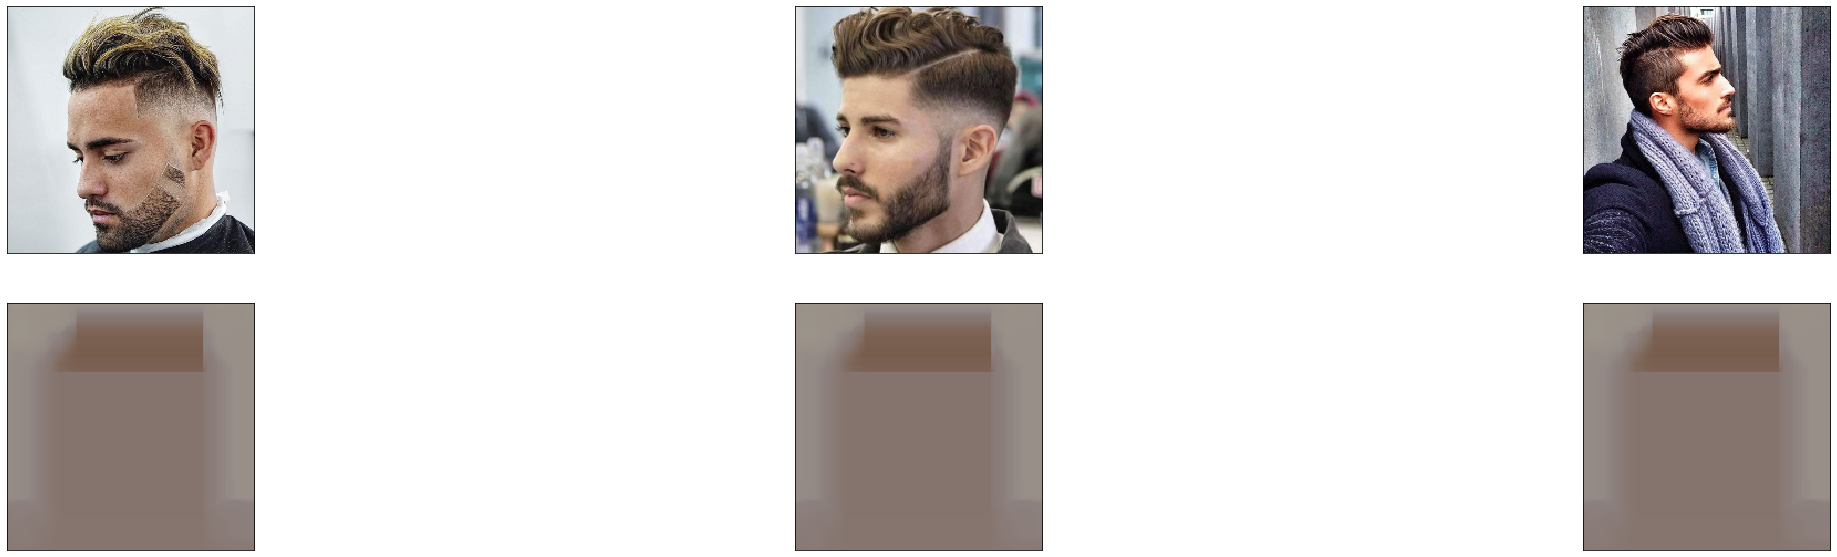

In [36]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 3  # how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(224,224,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(224, 224,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.datasets import mnist

(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

image_size = x_train1.shape[1]
original_dim = image_size * image_size
x_train1 = np.reshape(x_train1, [-1, original_dim])
x_test1 = np.reshape(x_test1, [-1, original_dim])
x_train1 = x_train.astype('float32') / 255
x_test1 = x_test.astype('float32') / 255

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
#source:https://github.com/keras-team/keras/blob/master/examples/variational_autoencoder.py

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda
from keras.utils import plot_model
import argparse


#mapping inputs to latent distribution parameters
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


In [0]:
#map sampled latent points back to reconstructed inputs
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)